In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_excel('downloads/Online_Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
unique_df = df[['Country', 'CustomerID']].drop_duplicates()

In [11]:
unique_df

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0
538812,United Kingdom,14569.0


In [12]:
unique_df.nunique()

Country         38
CustomerID    4372
dtype: int64

TOP 10 COUNTRIES WITH THE HIGHEST NUMBER OF CUSTOMERS

<Axes: >

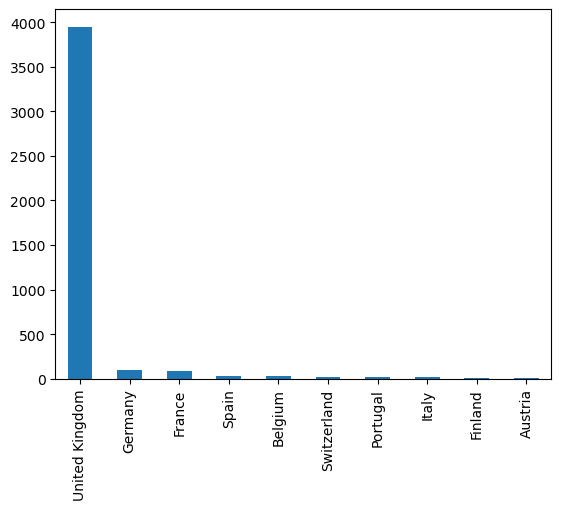

In [22]:
unique_df.Country.value_counts()[:10].plot(kind='bar')

In [20]:
countrywise_customers = unique_df.pivot_table(index = ['Country'], aggfunc ='size')
countrywise_customers

Country
Australia                  9
Austria                   11
Bahrain                    3
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       4
European Community         1
Finland                   12
France                    88
Germany                   95
Greece                     4
Hong Kong                  1
Iceland                    1
Israel                     5
Italy                     15
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  20
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     31
Sweden                     8
Switzerland               22
USA   

ANALYSING THE UK DATA

In [23]:
uk_df=df[df.Country=='United Kingdom']
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [24]:
uk_df.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


FILTERING DATA FOR QUANTITY > 0

In [28]:
uk_df = uk_df[(uk_df['Quantity']>0)]
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    486286 non-null  object        
 1   StockCode    486286 non-null  object        
 2   Description  485694 non-null  object        
 3   Quantity     486286 non-null  int64         
 4   InvoiceDate  486286 non-null  datetime64[ns]
 5   UnitPrice    486286 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      486286 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.4+ MB


In [29]:
uk_df=uk_df[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
uk_df

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39
2,17850.0,2010-12-01 08:26:00,536365,8,2.75
3,17850.0,2010-12-01 08:26:00,536365,6,3.39
4,17850.0,2010-12-01 08:26:00,536365,6,3.39
...,...,...,...,...,...
541889,15804.0,2011-12-09 12:31:00,581585,12,1.95
541890,13113.0,2011-12-09 12:49:00,581586,8,2.95
541891,13113.0,2011-12-09 12:49:00,581586,24,1.25
541892,13113.0,2011-12-09 12:49:00,581586,24,8.95


In [30]:
#Calulate total purchase
uk_df['TotalPurchase'] = uk_df['Quantity'] * uk_df['UnitPrice']
uk_df

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
...,...,...,...,...,...,...
541889,15804.0,2011-12-09 12:31:00,581585,12,1.95,23.40
541890,13113.0,2011-12-09 12:49:00,581586,8,2.95,23.60
541891,13113.0,2011-12-09 12:49:00,581586,24,1.25,30.00
541892,13113.0,2011-12-09 12:49:00,581586,24,8.95,214.80


In [32]:
uk_group = uk_df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPurchase': lambda price: price.sum()})
uk_group

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34
...,...,...,...,...
18280.0,0,10,45,180.60
18281.0,0,7,54,80.82
18282.0,118,12,103,178.05


In [33]:
uk_group.columns=['days_since_last_txn','num_txn','quantity','spent_total']
9uk_group.head()

,days_since_last_txn,num_txn,quantity,spent_total
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


 CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
 Customer Value = Average Order Value * Purchase Frequency

In [35]:
uk_group['avg_order_value'] = uk_group['spent_total']/uk_group['num_txn']
uk_group

,days_since_last_txn,num_txn,quantity,spent_total,avg_order_value
CustomerID,,,,,
12346.0,0,1,74215,77183.60,77183.600000
12747.0,366,103,1275,4196.01,40.737961
12748.0,372,4596,25748,33719.73,7.336756
12749.0,209,199,1471,4090.88,20.557186
12820.0,323,59,722,942.34,15.971864
...,...,...,...,...,...
18280.0,0,10,45,180.60,18.060000
18281.0,0,7,54,80.82,11.545714
18282.0,118,12,103,178.05,14.837500


In [37]:
purchase_freq=sum(uk_group['num_txn'])/uk_group.shape[0]
purchase_freq

90.37107880642694

In [38]:
churn = 1 - uk_group[uk_group.num_txn > 1].shape[0]/uk_group.shape[0]
churn

0.018107625605712774

PROFIT MARGIN CALCULATION - ASSUMPTION 5% PROFIT FOR A BUSINESS

In [39]:
uk_group['profit_margin']=uk_group['spent_total']*0.05

In [40]:
uk_group

,days_since_last_txn,num_txn,quantity,spent_total,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800
12747.0,366,103,1275,4196.01,40.737961,209.8005
12748.0,372,4596,25748,33719.73,7.336756,1685.9865
12749.0,209,199,1471,4090.88,20.557186,204.5440
12820.0,323,59,722,942.34,15.971864,47.1170
...,...,...,...,...,...,...
18280.0,0,10,45,180.60,18.060000,9.0300
18281.0,0,7,54,80.82,11.545714,4.0410
18282.0,118,12,103,178.05,14.837500,8.9025


In [42]:
uk_group['CLTV']=((uk_group['avg_order_value']*purchase_freq)/churn)*uk_group['profit_margin']
uk_group

,days_since_last_txn,num_txn,quantity,spent_total,avg_order_value,profit_margin,CLTV
CustomerID,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,1.486579e+12
12747.0,366,103,1275,4196.01,40.737961,209.8005,4.265538e+07
12748.0,372,4596,25748,33719.73,7.336756,1685.9865,6.173424e+07
12749.0,209,199,1471,4090.88,20.557186,204.5440,2.098545e+07
12820.0,323,59,722,942.34,15.971864,47.1170,3.755789e+06
...,...,...,...,...,...,...,...
18280.0,0,10,45,180.60,18.060000,9.0300,8.139045e+05
18281.0,0,7,54,80.82,11.545714,4.0410,2.328507e+05
18282.0,118,12,103,178.05,14.837500,8.9025,6.592356e+05


CLTV PREDICTION FOR UK

In [43]:
uk_df['month_year_wise'] = uk_df['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))
uk_df

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase,month_year_wise
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
...,...,...,...,...,...,...,...
541889,15804.0,2011-12-09 12:31:00,581585,12,1.95,23.40,Dec-2011
541890,13113.0,2011-12-09 12:49:00,581586,8,2.95,23.60,Dec-2011
541891,13113.0,2011-12-09 12:49:00,581586,24,1.25,30.00,Dec-2011
541892,13113.0,2011-12-09 12:49:00,581586,24,8.95,214.80,Dec-2011


In [45]:
first_purchase = df['InvoiceDate'].min()
last_purchase = df['InvoiceDate'].max()
delta = last_purchase - first_purchase
delta.days

373

In [51]:
sale=uk_df.pivot_table(index=['CustomerID'],columns=['month_year_wise'],values='TotalPurchase',aggfunc='sum',fill_value=0).reset_index()
sale

month_year_wise,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,18280.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.60,0.00,0.00,0.00,0.00
3917,18281.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80.82,0.00,0.00,0.00,0.00,0.00
3918,18282.0,0.00,100.21,0.00,77.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3919,18283.0,117.68,0.00,0.00,208.00,102.90,215.00,143.19,307.53,0.00,99.47,651.56,114.65,134.90


In [52]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)
sale

month_year_wise,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84,32619.36
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,4090.88
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,18280.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.60,0.00,0.00,0.00,0.00,180.60
3917,18281.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80.82,0.00,0.00,0.00,0.00,0.00,80.82
3918,18282.0,0.00,100.21,0.00,77.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,178.05
3919,18283.0,117.68,0.00,0.00,208.00,102.90,215.00,143.19,307.53,0.00,99.47,651.56,114.65,134.90,1977.20


In [53]:
X=sale[['Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011']]
y=sale[['CLV']]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)
y_pred

array([[ 211.03823879],
       [1047.41375738],
       [3443.44571923],
       ...,
       [2288.82387377],
       [ 525.37110222],
       [ 211.03823879]])

In [62]:
from sklearn import metrics
print("R-Square:",metrics.r2_score(y_test, y_pred))
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square: 0.9655486752993305
MAE: 590.8993007425959
MSE 1863005.4624675796
RMSE: 1364.9195809525115


In [63]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()

rfc.fit(X_train,y_train)
rf_pred = rfc.predict(X_test)
rf_pred

C:\Users\AL53348\AppData\Local\Temp\1\ipykernel_14568\3353915115.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


array([ 586.32997368, 1485.7335    , 2542.4692    , ..., 1609.0738    ,
        357.2116    ,  586.32997368])

In [64]:
print("R-Square:",metrics.r2_score(y_test, rf_pred))

R-Square: 0.713715614123136
